In [71]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import skimage.exposure

In [72]:
def image_fill(Binary_image):
    # Mask used to flood filling.
    im_th=Binary_image.astype('uint8').copy()
    h, w = im_th.shape[:2]
    im_floodfill = im_th.copy()
    mask = np.zeros((h+2, w+2), np.uint8)

    # Floodfill from point (0, 0)
    cv2.floodFill(im_floodfill, mask, (0,0), 1);

    # Invert floodfilled image
    im_floodfill_inv = cv2.bitwise_not(im_floodfill)

    # Combine the two images to get the foreground.
    im_out = im_th | im_floodfill_inv
    im_out[im_out==254]=0
    return im_out

In [99]:
def get_mask(image, op = 'and'):
  image = skimage.exposure.rescale_intensity(image, in_range=(20,200), out_range=(0,255))
  hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
 
  # maks to filter yellow color in the image
  yellow_lower = np.array([10, 100, 90], np.uint8)
  yellow_upper = np.array([30, 255, 255], np.uint8)
  yellow_mask = cv2.inRange(hsv, yellow_lower, yellow_upper)
  yellow_mask = image_fill(yellow_mask)
  # cv2_imshow(yellow_mask)

  #Purple mask
  purple_lower = np.array([135, 90, 38], np.uint8)
  purple_upper = np.array([165, 255, 255], np.uint8)
  purple_mask = cv2.inRange(hsv, purple_lower, purple_upper)
  purple_mask = image_fill(purple_mask)
  # cv2_imshow(purple_mask)

  #white mask [MODIFY]
  # white_lower = np.array([170, 245, 245], np.uint8)
  # white_upper = np.array([180, 255, 255], np.uint8)
  # # white_lower = np.array([0, 0, 204], np.uint8)
  # # white_upper = np.array([180, 25, 255], np.uint8)
  # white_mask = cv2.inRange(hsv, white_lower, purple_upper)
  # white_mask = image_fill(white_mask)
  # cv2_imshow(white_mask)
  
  # Mask to filter red color from the image
  red_lower = np.array([0, 120, 50], np.uint8)
  red_upper = np.array([10, 255, 255], np.uint8)
 
  qred_lower = np.array([170, 70, 50], np.uint8)
  qred_upper = np.array([180, 255, 255], np.uint8)
 
  red_maskx = cv2.inRange(hsv, red_lower, red_upper)
  red_masky = cv2.inRange(hsv, qred_lower, qred_upper)
  red_mask = red_maskx | red_masky

  #Final mask
  mask = red_mask | yellow_mask | purple_mask #| white_mask
  mask = cv2.GaussianBlur(mask,(5,5),cv2.BORDER_DEFAULT)
  mask = image_fill(mask)
  cv2_imshow(mask)
  return mask

In [97]:
def find_objects(image):
 
  mask = get_mask(image)
  # Generated output 
  res = cv2.bitwise_and(image, image, mask = mask)
  cv2_imshow(res)

  # Get the image contours 
  contours, hierarchy = cv2.findContours(mask,
                                        cv2.RETR_TREE,
                                        cv2.CHAIN_APPROX_SIMPLE)
  
  for c in contours:
    rect = cv2.boundingRect(c)
    if rect[2] < 20 or rect[3] < 20: continue # Threshhold width and height
    x,y,w,h = rect
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
    
  cv2_imshow(image)

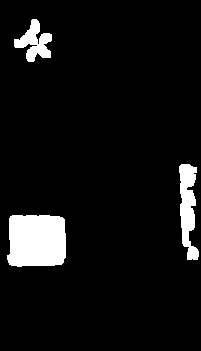

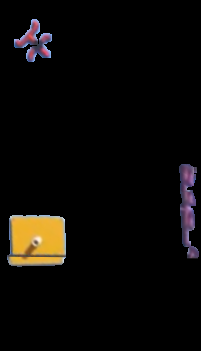

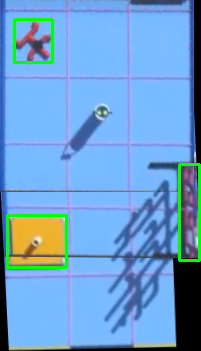

In [100]:
image_path = '/content/finalImage.png'
image = cv2.imread(image_path)
find_objects(image)